1) EDA

In [1]:
#Usual Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('international_matches.csv')
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [4]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [5]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [6]:
df['date'] = pd.to_datetime(df['date'])

1.1) Top 10 Fifa Rank

In [7]:
#let's re-shape the data a bit
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')
#fifa_points_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nlargest(10, 'rank_points') 

#let's see the 5 strongest teams
fifa_rank_top

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_22200\3936163039.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_rank = home.append(away)


,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


1.2) Top 10 Offensers

In [8]:
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)
# offense
#last match that each country played
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
offense_top_data

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_22200\2376855644.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  offense  = home.append(away)


,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


1.3) Top 10 Defenders

In [9]:
defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)
# offense
#last match that each country played
defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top_data = defense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
defense_top_data

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_22200\1209720154.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  defense  = home.append(away)


,date,team,defense_score
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


1.4) Top 10 Midfield

In [10]:
midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away)
# offense
#last match that each country played
midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = defense .groupby('team').cumcount()+1
midfield_top_data = midfield [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
midfield_top_data

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_22200\97359950.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  midfield  = home.append(away)


,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
23909,2022-06-14,Belgium,85.5
23760,2022-06-06,Brazil,85.5
23907,2022-06-14,Italy,84.5
23867,2022-06-12,Portugal,84.5
23885,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


1.5) Top 10 Total Score

In [11]:
df['home_total_score'] = (df['home_team_mean_offense_score'] + df['home_team_mean_defense_score']+df['home_team_mean_midfield_score'])/3
df['away_total_score'] = (df['away_team_mean_offense_score'] + df['away_team_mean_defense_score']+df['away_team_mean_midfield_score'])/3
df['diff_total_score'] = df['home_total_score'] - df['away_total_score']

In [12]:
total_score = df[['date', 'home_team', 'away_team', 'home_total_score', 'away_total_score']]
home = total_score [['date', 'home_team','home_total_score']].rename(columns = {'home_team': 'team', 'home_total_score' : 'total_score'})
away = total_score [['date', 'away_team','away_total_score']].rename(columns = {'away_team': 'team', 'away_total_score' : 'total_score'})
total_score  = home.append(away)
# offense
#last match that each country played
total_score   = total_score .sort_values(['team', 'date'], ascending=[True, False])
total_score ['row_number'] = defense .groupby('team').cumcount()+1
total_score_top_10 = total_score [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'total_score')
total_score_top_10

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_22200\106358092.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_score  = home.append(away)


,date,team,total_score
23885,2022-06-13,France,86.433333
23866,2022-06-12,Spain,85.833333
23906,2022-06-14,England,85.666667
23760,2022-06-06,Brazil,85.533333
23867,2022-06-12,Portugal,85.233333
23741,2022-06-05,Argentina,85.066667
23907,2022-06-14,Germany,84.833333
23907,2022-06-14,Italy,84.666667
23909,2022-06-14,Belgium,84.000000
23908,2022-06-14,Netherlands,83.900000


2) Simulation

2.1) Feature Engineering

In [13]:
# feature generation
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0 # take draw as lost
df['is_stake'] = df['tournament'] != 'Friendly'

2.2) Model

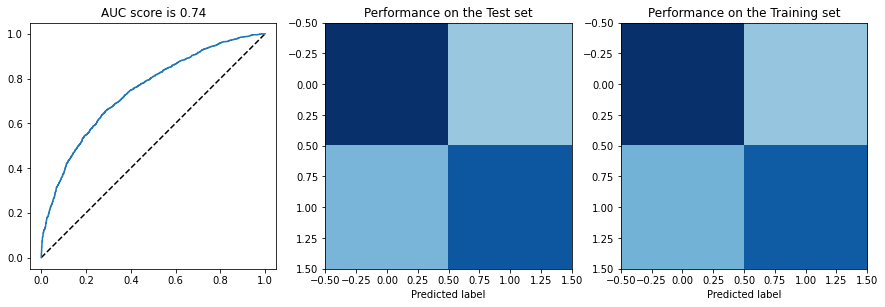

In [14]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference','is_stake']], df['is_won']
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

2.3) Test

In [15]:
#List of all Teams in 2022 World Cup
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [16]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(teams_worldcup) & (df['date']>'2021-01-01')] #Get last 2 years of information (try to get all time too, get interesting results!)
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(teams_worldcup)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

In [17]:
#The idea is to separete the performance of each Team as Home or Away.
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

In [18]:
world_cup_rankings_away.head(13)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,5.875000,1717.500000
Australia,36.428571,1477.571429
Belgium,1.181818,1810.818182
Brazil,1.888889,1810.444444
Cameroon,49.428571,1431.857143
Canada,55.866667,1400.000000
Costa Rica,45.857143,1440.928571
Croatia,15.600000,1607.800000
Denmark,10.500000,1640.000000


In [19]:
world_cup_rankings_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'Japan', 'Mexico', 'Morocco', 'Netherlands',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Spain', 'Switzerland', 'Tunisia', 'USA', 'Uruguay', 'Wales'],
      dtype='object', name='away_team')

In [22]:
# first, pip install tqdm
from tqdm import tqdm #SHOW TASK BAR

simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)

        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)

        if f == 'final':    
            step_final = ['final'] * 1
            candidates_final = zip(step_final,winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            simulation_winners.append(df_candidates_final)
            simulation_results_winners.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 

df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_winners)

df_results = pd.concat([df_candidates_round_16,df_candidates_quarterfinal,df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulations_winners = sum(simulation_results_winners, [])

100%|██████████| 1000/1000 [00:50<00:00, 19.67it/s]


In [23]:
#Counter is used to easily count recurrent elements in a list check this link for more info (https://realpython.com/python-counter/)
from collections import Counter

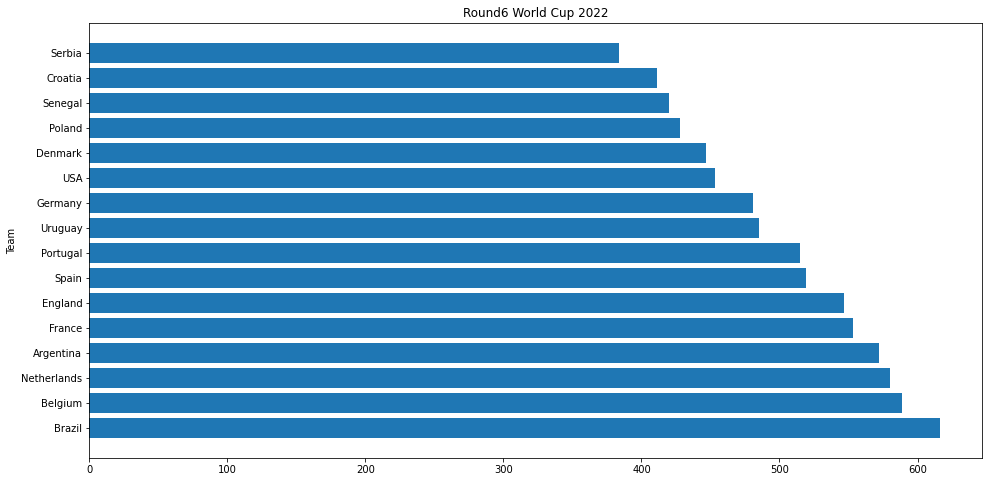

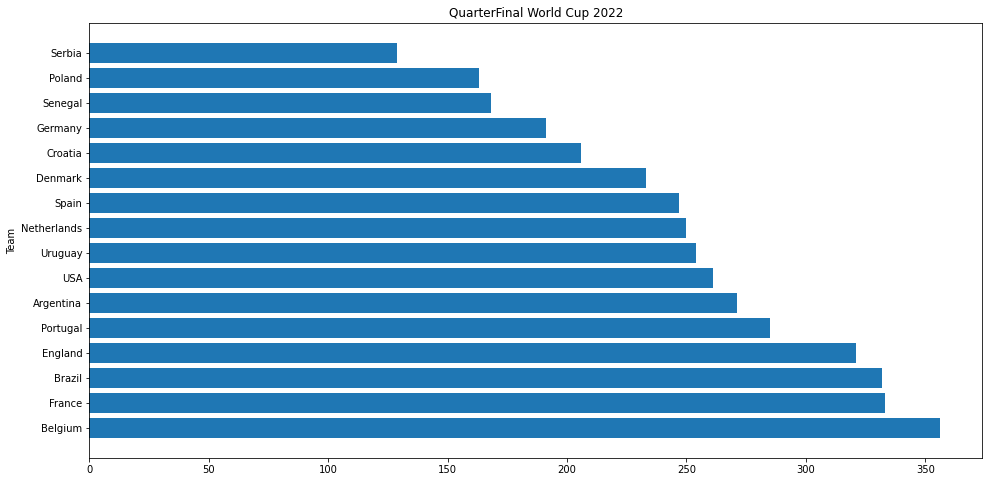

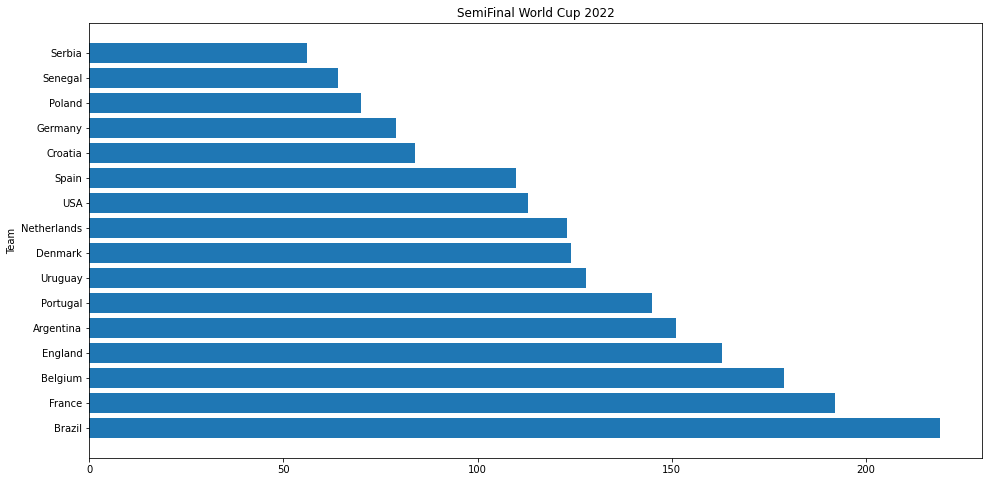

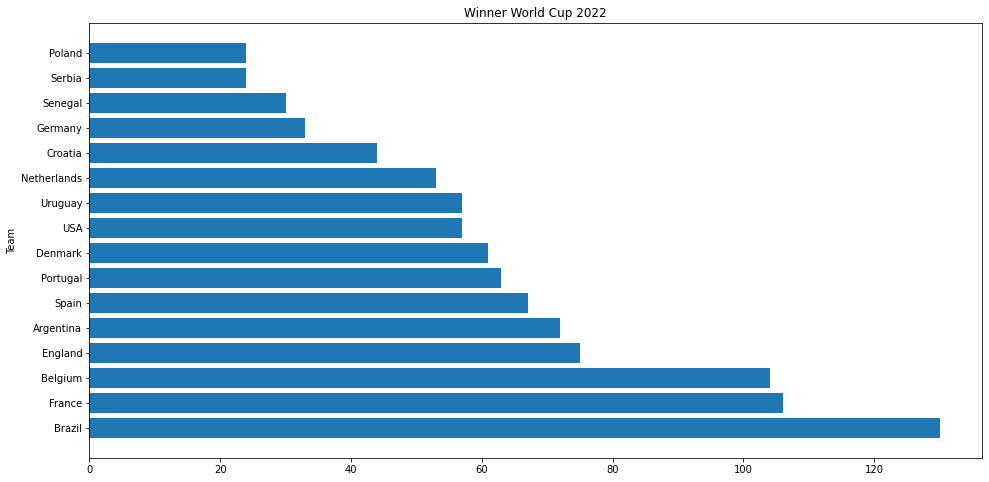

In [24]:
from matplotlib import figure

lst_results = [simulation_results_round16,simulation_results_quarterfinal,simulation_results_semifinal,simulations_winners]
for i in lst_results:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(16,8))

    ax.barh(x, y)

    ax.set_ylabel('Team')

    if i == simulation_results_round16:
        ax.set_title('Round6 World Cup 2022')
    if i == simulation_results_quarterfinal:
        ax.set_title('QuarterFinal World Cup 2022')
    if i == simulation_results_semifinal:
        ax.set_title('SemiFinal World Cup 2022')
    if i == simulations_winners:
        ax.set_title('Winner World Cup 2022')

        
    plt.show()

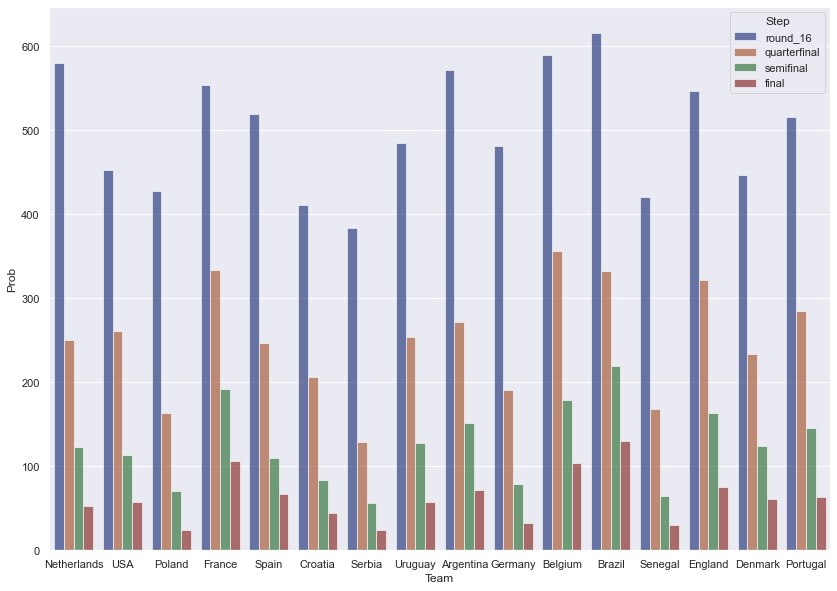

In [25]:
#Join all data in onw single view
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,10)})

# Draw a nested barplot by Team and Step
g = sns.barplot(data=df_results, x="Team",y='Prob', hue="Step", estimator=sum, palette="dark", alpha=.6)

Interpretations
1. Senegal and Serbia most likely the weakest teams, for less appearence in Finals;
2. Croatia and Serbia has less than 50% chance to pass to quarter-finals ( < 400/800 out of 1000 simulations);
3. France is 2st most likely to win, although Belgium appears more in semi-finals than France;
4. Top 3 Teams are Brazil, Belgium and France with more than 10% chances of winning the tournment.

After 1000 simulation Brazil gets the first place, followed by Belgium almost tied, which are 2 very good teams favorite in this tournment. Good to notice that every retry the orders changes a little, France and Spain comme up in 1st or 2st place sometimes. In overall I liked very much the results and all the experience this project gave to me! Hope you enjoyed too 😃